# ***CREDIT CARD FRAUD DETECTION***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import * 
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [4]:
cc = pd.read_csv(r"C:\Users\shrut\OneDrive\Desktop\Internship\creditcard-Dataset\creditcard.csv")

In [7]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [10]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
cc.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [14]:
cc.shape

(284807, 31)

In [16]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
cc.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [21]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

From the above output, we can derive the following insights:

- Total Entries: The dataset comprises 284807 rows.

- Columns: There are 31 columns, with a combination of float and int data types. 
           We don't have any object data type here.
  
- Missing Values: None

In [25]:
# Understanding the Correlation

In [27]:
# Finding the number of fraud cases in the dataset
fraud = cc[cc['Class'] == 1]
valid = cc[cc['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases     = ', len(cc[cc['Class'] == 1]))
print('Not Fraud Cases = ', len(cc[cc['Class'] == 0]))

0.0017304750013189597
Fraud Cases     =  492
Not Fraud Cases =  284315


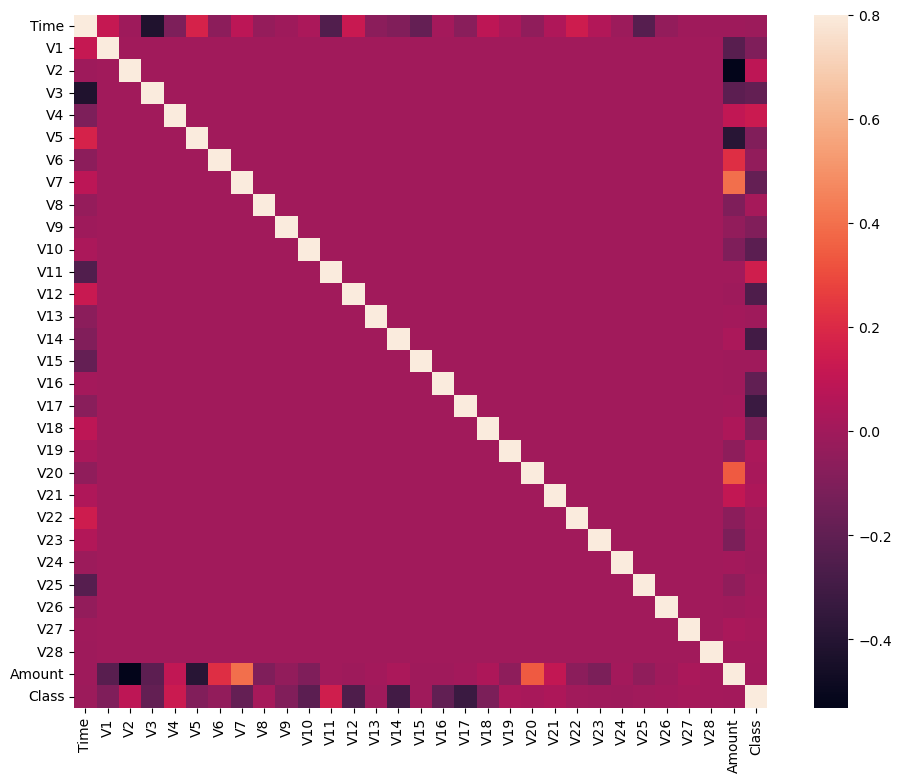

In [29]:
# Correlation matrix
corrmat = cc.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

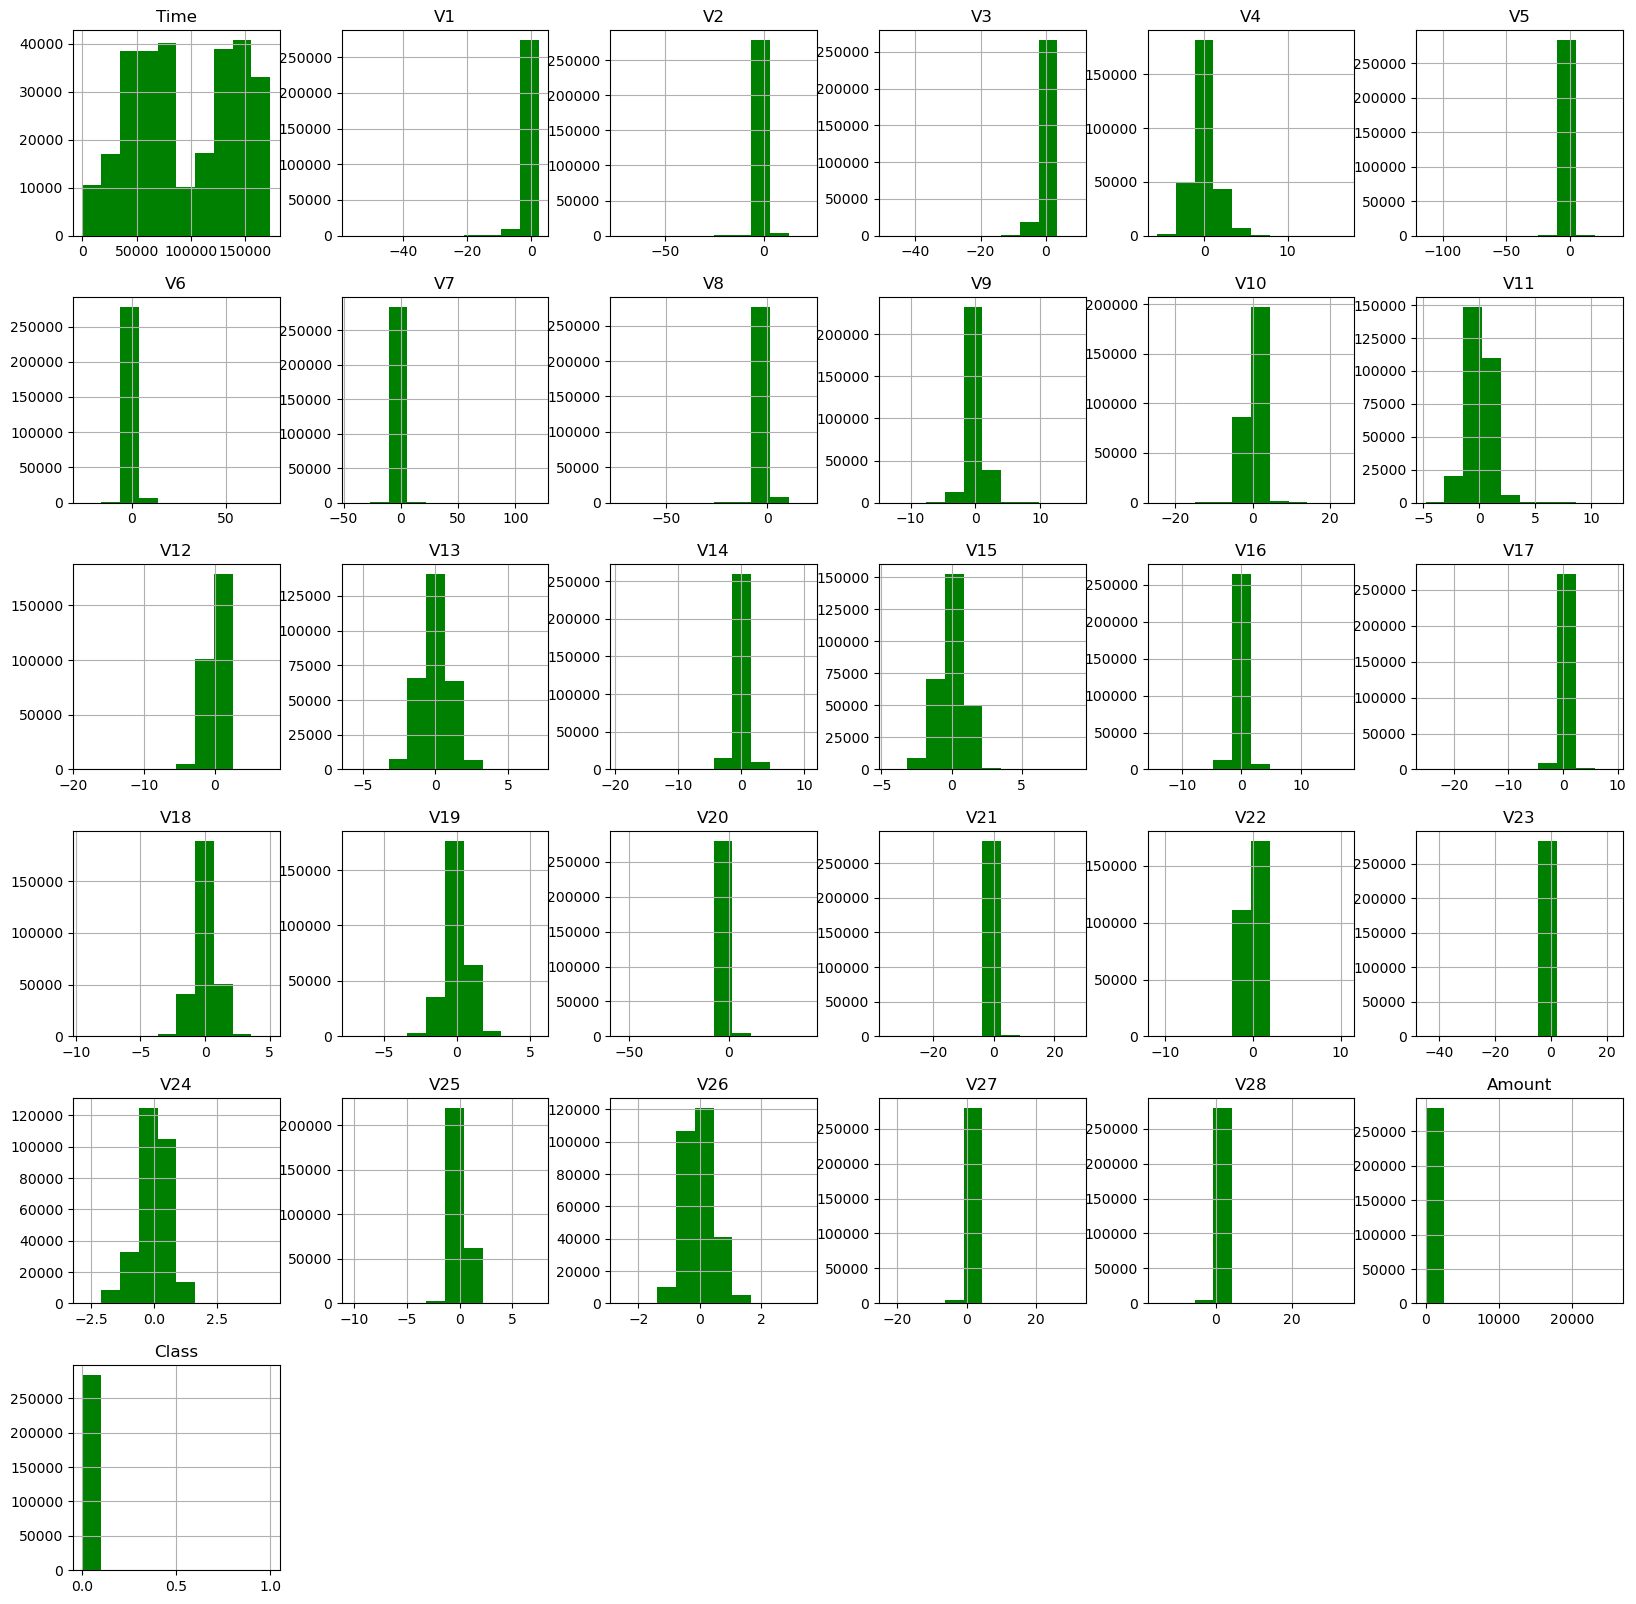

In [30]:
cc.hist(figsize=(20,20),color='green')
plt.show()

In [32]:
# Checking Imbalance in the data

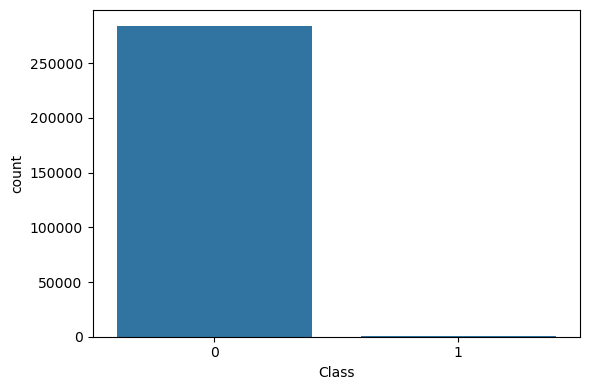

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x = 'Class', data = cc)
plt.tight_layout()

In [34]:
#cheking the count
cc['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0 --> Normal Transaction


1 --> Fraudulent Transaction

Only 492 fraud out all the transactions. This means data is highly Unbalanced. 

Classes 0 & 1 are highly imbalanced

In [36]:
# Seprating the data for analysis

In [37]:
legit = cc[cc.Class == 0]    
fraud = cc[cc.Class == 1]    

In [38]:
#printing them
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [39]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [40]:
#statistical measures of the data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The mean transaction out of all 492 is 122$. 

So for all the Fraud transaction, the mean transaction amount is bigger that the legit, normal transaction


In [42]:
#comparing the values for both transaction
cc.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Data Preprocessing

In [46]:
cc.isnull().sum()[cc.isnull().sum() > 0]

Series([], dtype: int64)

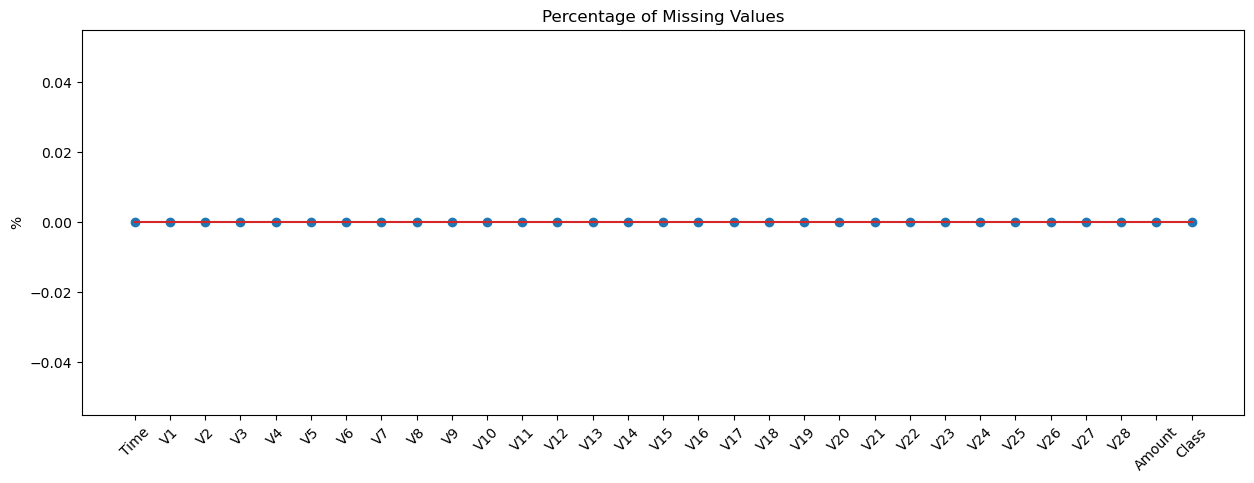

In [47]:
# Visualize the Null values

missing_values_per = pd.DataFrame((cc.isnull().sum()/len(cc))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

In [49]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [56]:
cc.select_dtypes(include='object').columns

Index([], dtype='object')

# Model Building 

In [60]:
#importing Library
from sklearn.model_selection import train_test_split

In [62]:
# Define the feature matrix `X` and target vector `y`
X = cc.drop('Class', axis=1)
y = cc['Class']

In [63]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import *

In [65]:
# Normalize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# Handling class imbalance using SMOTE (oversampling minority class)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

In [68]:
# Split the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=123)

## Logistic Regression

In [73]:
#importing Library
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()                          #creating a function of it & Storing it in a variable named as 'logreg'
logreg.fit(train_x, train_y)  

LogisticRegression()

In [75]:
pred_logreg = logreg.predict(test_x)
print(confusion_matrix(test_y, pred_logreg))

[[83082  2056]
 [ 6703 78748]]


In [76]:
print(classification_report(test_y, pred_logreg)) 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85138
           1       0.97      0.92      0.95     85451

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



In [77]:
logreg_accuracy = accuracy_score(test_y, pred_logreg)
print("Logestic Regression Accuracy = ",logreg_accuracy)

Logestic Regression Accuracy =  0.9486543681011085


## Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [82]:
pred_dt = dt.predict(test_x)
print(confusion_matrix(test_y, pred_dt))

[[84861   277]
 [   96 85355]]


In [83]:
print(classification_report(test_y, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85138
           1       1.00      1.00      1.00     85451

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [84]:
dt_accuracy = accuracy_score(test_y, pred_dt)
print("Decision Tree Accuracy = ",dt_accuracy)

Decision Tree Accuracy =  0.9978134580776017


## Random Forest

In [86]:
# Experimenting with different algorithms, ensemble methods
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(train_x, train_y) #model is build

RandomForestClassifier()

In [87]:
# Evaluate the Random Forest model
pred_rf = rf.predict(test_x)
print(confusion_matrix(test_y, pred_rf))  

[[85125    13]
 [    0 85451]]


In [88]:
print(classification_report(test_y, pred_rf)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85138
           1       1.00      1.00      1.00     85451

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [89]:
rf_accuracy = accuracy_score(test_y, pred_rf)
print("Random Forest Accuracy = ",rf_accuracy)

Random Forest Accuracy =  0.9999237934450639


## Comparing All Models

In [93]:
print("Logestic Regression Accuracy = ", logreg_accuracy)
print("Decision Tree Accuracy       = ", dt_accuracy)
print("Random Forest Accuracy       = ", rf_accuracy)

Logestic Regression Accuracy =  0.9486543681011085
Decision Tree Accuracy       =  0.9978134580776017
Random Forest Accuracy       =  0.9999237934450639


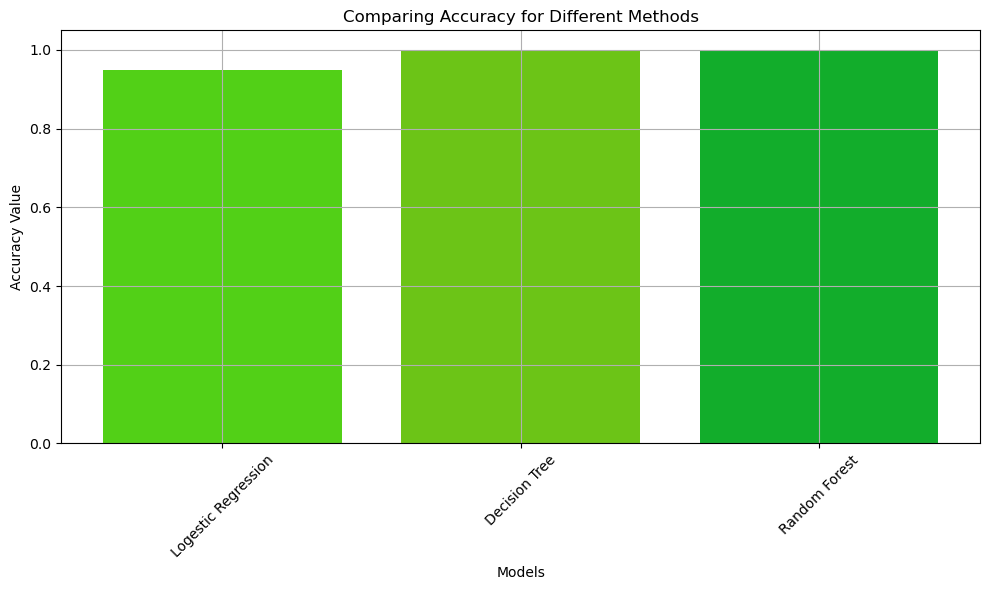

In [96]:
# MSE values for each method on test data
methods     = ['Logestic Regression', 'Decision Tree', 'Random Forest']
mse_values = [logreg_accuracy, dt_accuracy, rf_accuracy]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, mse_values, color=[ '#52D017', '#6CC417', '#12AD2B'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Value')
plt.title('Comparing Accuracy for Different Methods')
plt.xticks(rotation=45)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

After experimenting with various algorithms, Random Forest is giving the best results. 